<a href="https://colab.research.google.com/github/iamNirmeshGupta/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Nirmesh_Gupta_Individual_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


##**This project is aimed at predicting the case of customers' default payment in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - Credible or not Credible clients.**

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from scipy.stats import uniform

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC


import warnings
warnings.simplefilter("ignore")
from pprint import pprint
import joblib
import imblearn

In [3]:
# Importing the dataset

df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/alma better/Credit Card Default prediction - Capstone Project - Classification/Copy of default of credit card clients.xls")

In [4]:
# Basic Inspection

df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [5]:
# Removing the unnamed row and setting row 0 as column header

df1 = df.rename(columns=df.iloc[0]).loc[1:]
df1.reset_index(inplace=True)
df1.drop(['index'],inplace=True,axis = 1)

In [6]:
# Basic Inspection

df1.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [7]:
# Checking the shape of the data

df1.shape

(30000, 25)

##**Understanding the Data**

###**Data Description**

###**There are 25 variables:**
**• ID**: ID of each client. \
**• LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit. \
**• SEX:** Gender (1=male, 2=female) \
**• EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others) \
**• MARRIAGE:** Marital status (1=married, 2=single, 3=others) \
**• AGE:** Age in years \
**• PAY_0:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) \
**• PAY_2:** Repayment status in August, 2005 (scale same as above) \
**• PAY_3:** Repayment status in July, 2005 (scale same as above) \
**• PAY_4:** Repayment status in June, 2005 (scale same as above) \
**• PAY_5:** Repayment status in May, 2005 (scale same as above) \
**• PAY_6:** Repayment status in April, 2005 (scale same as above) \
**• BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar) \
**• BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar) \
**• BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar) \
**• BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar) \
**•BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar) \
**• BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar) \
**• PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar) \
**• PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar) \
**• PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar) \
**• PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar) \
**• PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar) \
**• PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar) \
**• default.payment.next.month:** Default payment (1=yes, 0=no)

In [8]:
# Printing all the columns in the data

df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
# Checking basic data info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [10]:
# Checking the pay column
df1['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

###**What do 0 and -2 mean in PAY_X columns?**
From dataset documentation: PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above).We notice that code 0 and -2 are in the PAY_X columns by checking the value counts but are not included in the data description. Also by doing the value_counts, it shows 0 is the most frequent observation.

After searching online, I found:

-2: No consumption;
-1: Paid in full;
0: The use of revolving credit, meaning the payment wasn't due, which makes sense that most customers were using the revolving credit.

## **Data Cleaning**

###**Checking null values**

In [11]:
# Checking is any of the columns contain any null values
df1.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

###**As we can see there are no null values in our dataset, which is good.**

###**Checking duplicate rows**

In [12]:
# Checking if the dataset contains any duplicate rows
df1.duplicated().any()

False

**There no duplicate records in our dataset either.**

In [13]:
#Checking entries of the "ID" column
df1['ID'].value_counts()

1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: ID, Length: 30000, dtype: int64

**The 'ID' entries are unique for every row and seem to serve the purpose of a serial number. I will drop that variable**

In [14]:

# Dropping 'ID' column
df1.drop(['ID'],inplace=True,axis=1) 

###**Checking data types of the features**

In [15]:
# Using dataset info to check the data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

###As we can see, the data type of all the columns is 'object' type. So let's convert their data type to integer.

In [16]:
# Converting the data type of the features
df1 = df1.astype('int')

In [17]:
#Checking the dataset info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

###**Changing Column Names**

In [18]:
# Simplifying column names and bringing consistency
df1.rename(columns={"PAY_0":"PAY_1","default payment next month":"DEFAULT"},inplace=True)

df1.columns = [name.lower() for name in list(df1.columns)]

In [19]:
# Getting statistical summary of the dataset
df1.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
pay_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


**As we can see, marriage has a minimum value of 0 but the description said the minimum value is 1. And education has a maximum value of 6 while it was supposed to have a maximum value of 4 according to the data description.And we can also see that no data is extremely unreasonable in terms of values.**

##**Checking Categorical Columns**

**Here, we will check these 3 columns: "sex", "education" and "marriage"**

###Sex Column

In [20]:
# Checking sex column
df1['sex'].value_counts()

2    18112
1    11888
Name: sex, dtype: int64

The sex column looks fine and there is no undocumented data.

###Education Column

In [21]:
# Checking "education" column
df1['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

Here we notice 5 and 6 are both recorded as 'unknown' and there are values like 0,5 and 6 which are not explained in the dataset description. Since the amounts are so small, let's combine 0,4,5,6 to 0 which means"other.

In [22]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

df1["education"] = df1["education"].replace({4:0,5:0,6:0})
df1["education"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: education, dtype: int64

###Marriage Column

In [23]:
# Checking "marriage" column
df1['marriage'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

As we can see, there is a value of 0 as well in the "marriage" column, which is not described in the dataset description. \
What does 0 mean in 'MARRIAGE'? Since there are only 0.18% (or 54) observations of 0, we will combine 0 and 3 in one value as 'others'

In [24]:
# Combine 0 and 3 by changing the value 0 into 3

df1["marriage"] = df1["marriage"].replace({0:3})
df1["marriage"].value_counts()

2    15964
1    13659
3      377
Name: marriage, dtype: int64

##**Exploratory Data Analysis**

Let's first start with our target variable.

###**Checking frequency of defaulters and non defaulters**

Text(0.5, 1.0, 'Distribution of defaulters vs non-defaulters')

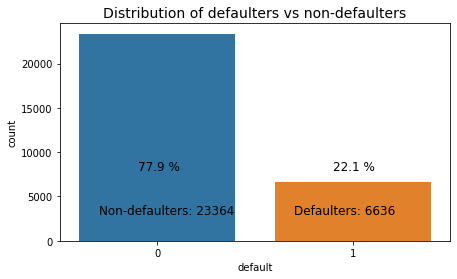

In [25]:
# Checking frequency of defaulters

defs = df1["default"].sum()
non_defs = len(df1) - defs

# Percentage
def_perc = round(defs / len(df1) * 100, 1)
non_def_perc = round(non_defs / len(df1) * 100, 1)

# import sys
plt.figure(figsize=(7, 4))
# sns.set_context('notebook', font_scale=1.2)
sns.countplot("default", data=df1)  # ,palette="Blues"
plt.annotate(
    "Non-defaulters: {}".format(non_defs),
    xy=(-0.3, 15000),
    xytext=(-0.3, 3000),
    size=12,
)
plt.annotate(
    "Defaulters: {}".format(defs), xy=(0.7, 15000), xytext=(0.7, 3000), size=12
)
plt.annotate(str(non_def_perc) + " %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(def_perc) + " %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title("Distribution of defaulters vs non-defaulters", size=14)

We can see, almost 78% of all the observations are of non-defaulters and almost 22% are of defaulters.
Also, there is class imbalance in our target feature which I will deal with later.

##**Relationship Between the Variables and Default**

Here, I will study the relationship between the features and credit card default.

In [26]:
def compare_default_across_features(df, col_name, dict_label={}):
  """
  This function quantifies and displays the distribution of default across the various classes of a feature.
  """

  #Create a cross-tab and rename indices for readability

  cross_tab = pd.crosstab(df["default"], df[col_name], margins=True, normalize=False)

  new_index = {0: "Non-default proportion", 1: "Default proportion"}
  new_columns = dict_label

  cross_tab.rename(index=new_index, columns=new_columns, inplace=True)

  # Plot a bar graph showing population distribution by the feature values

  plt.figure(figsize=(10,5))
  i = cross_tab.shape[1] - 1
  cross_tab.loc["All"][0:i].plot.bar(rot=30, fontsize=14)
  plt.title("Population distribution by " + col_name, fontsize=20)
  plt.ylabel("Count")
  plt.show()
  
  # Normalize the cross-tab and print it
  cross_tab_norm = cross_tab/cross_tab.loc["All"]
  display(cross_tab_norm)

  # Plot a bar graph showing population distribution by the feature values separating the defaulters and non defaulters
  plt.figure(figsize=(10,5))
  ax = sns.countplot(x=col_name, hue="default", data=df)
  plt.title("Population distribution by " + col_name + " with default and no-default", fontsize=20,)

  # Return the normalized cross-tab
  return cross_tab_norm



##**Is default proportion affected by Gender?**

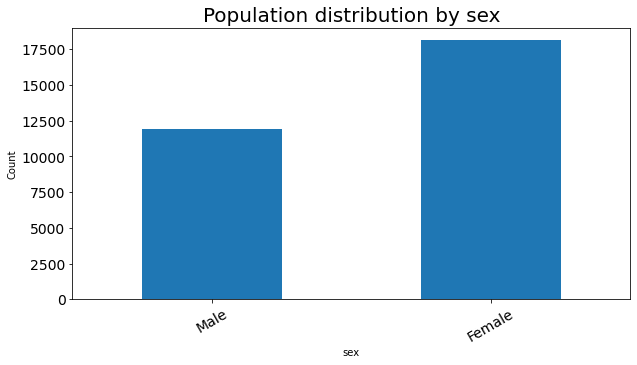

sex,Male,Female,All
default,,,
Non-default proportion,0.758328,0.792237,0.7788
Default proportion,0.241672,0.207763,0.2212
All,1.000000,1.000000,1.0000


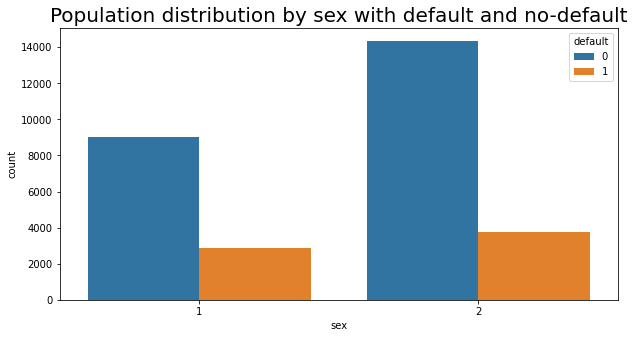

In [27]:
# Plotting population distribution by "sex"
gender_= compare_default_across_features(df1, 'sex', {1: "Male", 2: "Female"})

**Although there are more female credit card holders, the default proportion among men is higher, but the difference is not much significant.**

##**Is default proportion affected by Education?**

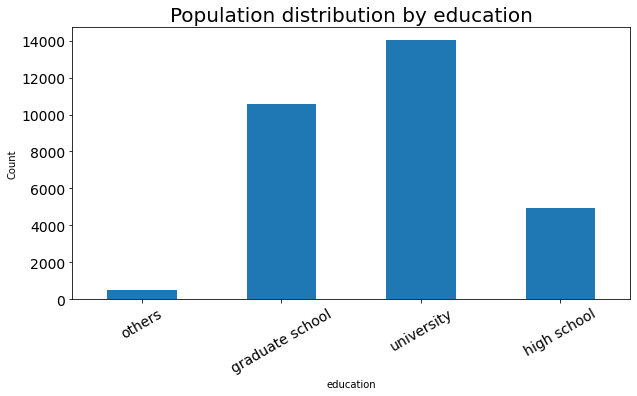

education,others,graduate school,university,high school,All
default,,,,,
Non-default proportion,0.929487,0.807652,0.762651,0.748424,0.7788
Default proportion,0.070513,0.192348,0.237349,0.251576,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.0000


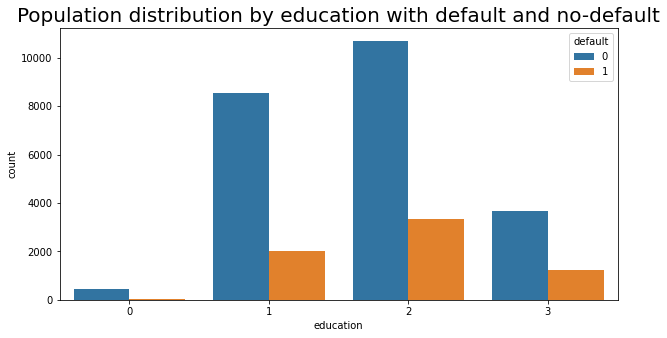

In [28]:
# Plotting population distribution by "education"
education_ = compare_default_across_features(df1, "education", {0:"others",1:"graduate school",2:"university",3:"high school"})

**A quick glance shows that the default proportion decreases with higher education level. This would agree with my intuition because more educated people tend to have higher paying jobs which might make it easier for them to pay back their debts and also, educated people are  more aware regarding the cons of defaulting on credit payments.**

##**Does marital status have anything to do with default risk? Note, the credit limit includes the family's total credit?**

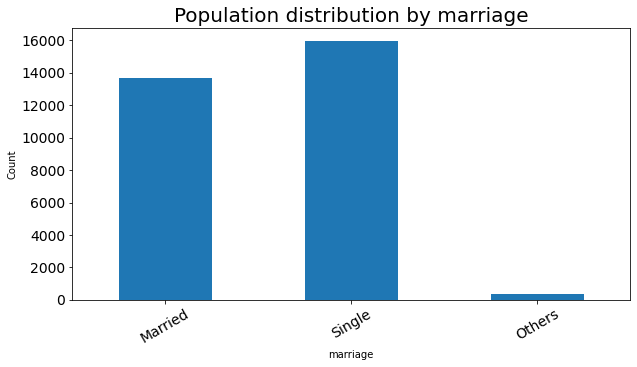

marriage,Married,Single,Others,All
default,,,,
Non-default proportion,0.765283,0.790717,0.763926,0.7788
Default proportion,0.234717,0.209283,0.236074,0.2212
All,1.000000,1.000000,1.000000,1.0000


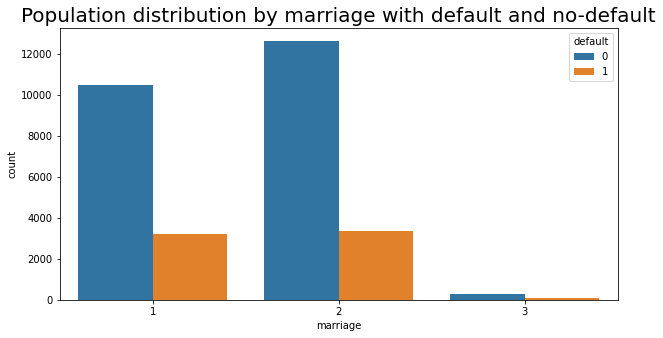

In [29]:
# Plotting population distribution by "marriage"
marriage_ = compare_default_across_features(df1, 'marriage', {1:'Married', 2:'Single', 3:'Others'})

**Married people have higher default proportions than single folks.**

##**Is the proportion of defaults correlated with age?**

Since age is a discrete variable, I have to figure out a way to bin the values.

In [30]:
# Segment the 'age' column to 6 groups

bins= [21,30,40,50,60,70,80]
labels = list(range(6))
df1['age'] = pd.cut(df1['age'],bins=bins, labels=labels,right=False)

# Covert categorical column into integer by extracting the code of the categories
df1.age = df1.age.cat.codes

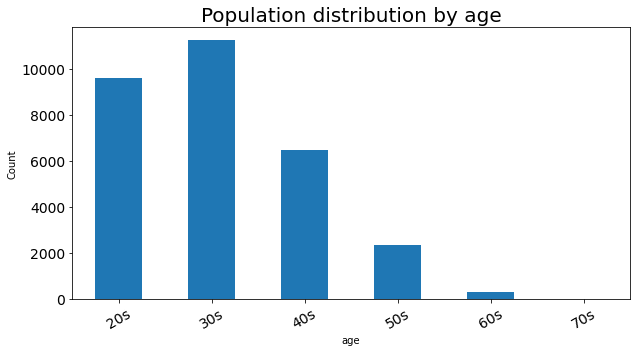

age,20s,30s,40s,50s,60s,70s,All
default,,,,,,,
Non-default proportion,0.771574,0.797473,0.770266,0.751388,0.716561,0.72,0.7788
Default proportion,0.228426,0.202527,0.229734,0.248612,0.283439,0.28,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0000


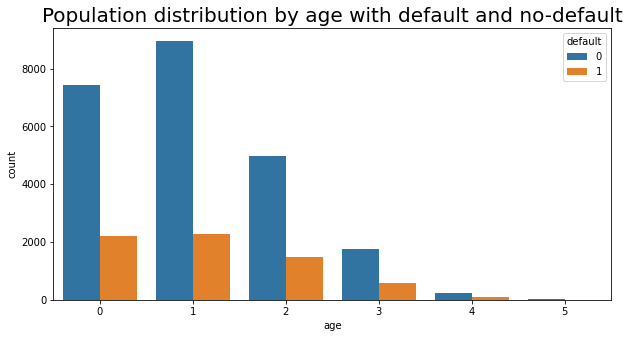

In [31]:
# Plotting population proportion by "age"
age_ = compare_default_across_features(df1, 'age', {0:'20s',1:'30s',2:'40s',3:'50s',4:'60s',5:'70s'})

**We can see that default proportion is lowest for people in their 30s and then steadily rises with age.**

##**Do customers with high education level get higher credit limit?**

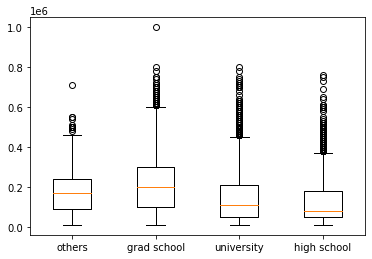

In [32]:
# Use boxplot to visualize credit limit grouped by education level

data = []
for i in [0,1,2,3]:
    temp = df1.loc[df1.education == i, "limit_bal"]
    data.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(["others","grad school", "university", "high school"])

plt.show()

**From the boxplot, we can see that, customers with grad school education have the highest 25% percentile,highest median,highest 75th percentile and highest maximum numbers, which proves that customers with higher education levels did get higher credit limits**

##**Is there any correlation between credit limit and the default payment next month?**

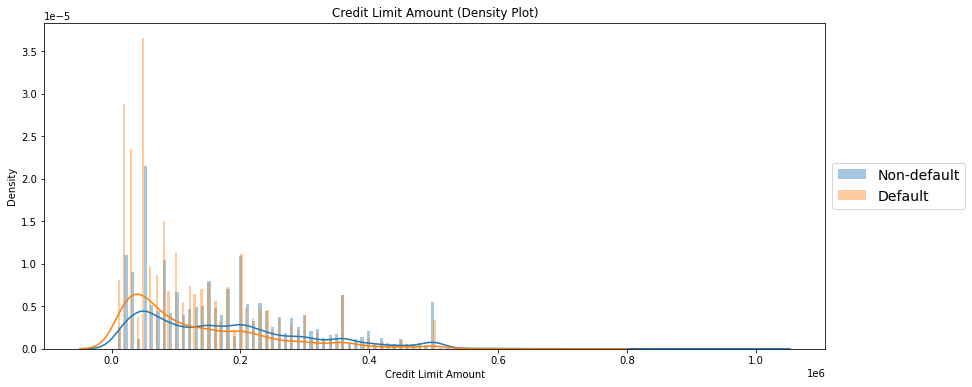

In [33]:
# Plotting relation between credit limit and default

def_0 = df1.loc[df1['default']==0]["limit_bal"]
def_1 = df1.loc[df1['default']==1]["limit_bal"]
plt.figure(figsize = (14,6))
sns.distplot(def_0,kde=True,bins=200, label='Non-default')
sns.distplot(def_1,kde=True,bins=200, label="Default")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)
plt.title('Credit Limit Amount (Density Plot)')
plt.xlabel('Credit Limit Amount')
plt.show()

**Looking at the density plot, it seems that people with higher credit limit have significantly lower default proportion. Again, intuitively that is not surprising because the people who have higher credit limits must have displayed long periods of timely repayments to reach that place**

##**Has the repayment status changed in the 6 months from April(PAY_6) to September(PAY_1)?**

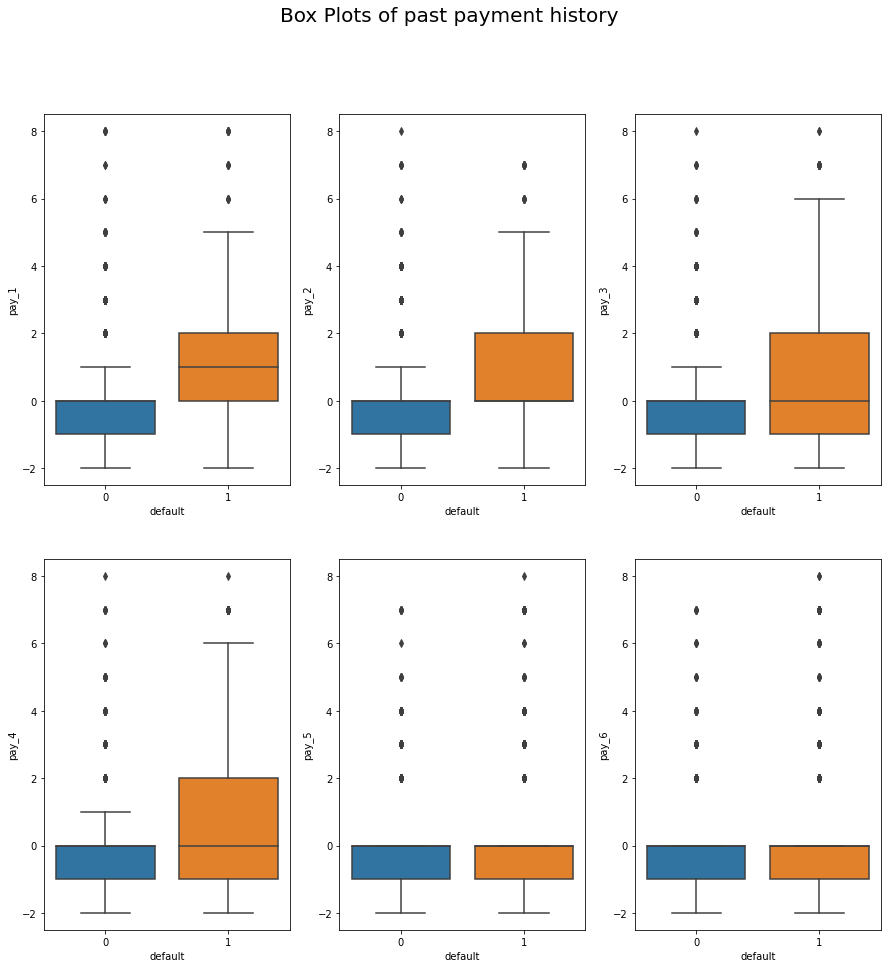

In [34]:
# Plotting past payment history and default
plt.rc('figure', figsize=(15, 15))
fig=plt.figure()
fig.suptitle('Box Plots of past payment history', fontsize=20)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    y = 'pay_' + str(i)
    sns.boxplot(x='default', y=y, data=df1)
plt.show()

**There was a huge jump from May(pay_5) to June(pay_4) when delayed payment increased significantly, then it peaked at July(pay_3).Things started to get better in August(pay_2) and September(pay_1)**

##**Why are there negative bills?**

As we can see from the statistical description of the data, the minimals of those 6 bill columns are negative numbers.Let's get the total number of negative bill amounts for each month.

In [35]:
# Getting the shape of observations having negative bills for each month

for col in ['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']:
    print(df1[df1[col]<0].shape)


(590, 24)
(669, 24)
(655, 24)
(675, 24)
(655, 24)
(688, 24)


**In general, there are 590-688 bills with negative amounts each month, which is around 2% of total 30,000 records monthly.**
**Let's calculate the average amount of negative bill generated per month.**

In [36]:
# Getting average negative bill amount per month
print('Average negative amounts in NT Dollars are: \n')
for col in ['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']:
  avg_neg_amount = df1.loc[df1[col]<0,col].mean()
  print(f'{col}  ',avg_neg_amount)

Average negative amounts in NT Dollars are: 

bill_amt1   -1154.7966101694915
bill_amt2   -1230.6218236173393
bill_amt3   -1466.2916030534352
bill_amt4   -1631.242962962963
bill_amt5   -1634.7083969465648
bill_amt6   -3074.4927325581393


**The average negative amount in NT dollar is 1150-3000 which is a small amount. Therefore, an informed guess would be, these are refunds from the last billing cycle.**

##**Correlation Heatmap**

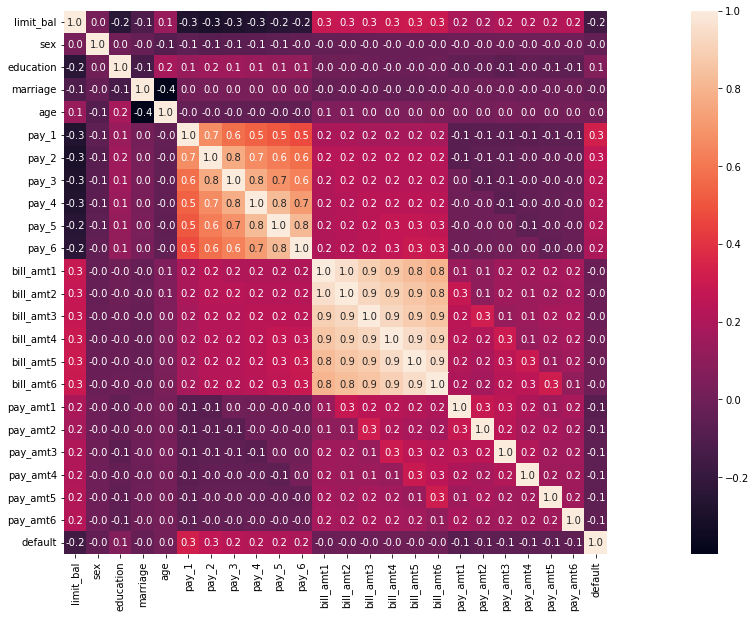

In [37]:
# Plotting the heatmap
corr = df1.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( corr, square=True, annot=True, fmt=".1f" )

As we can see, there is high correlation between bill_amt and pay_X features. I'll keep this in my min while I build the model.

##**Checking distribution and outliers in continuous features**

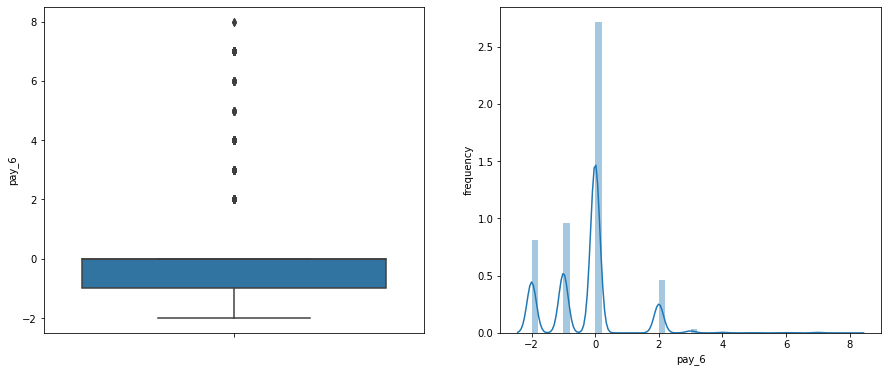

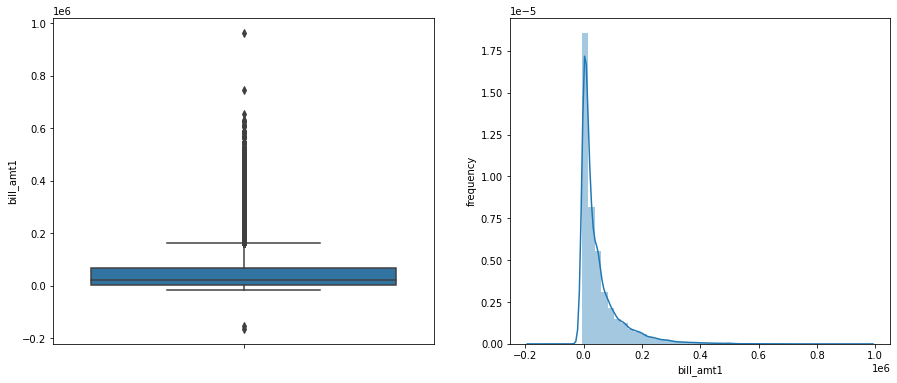

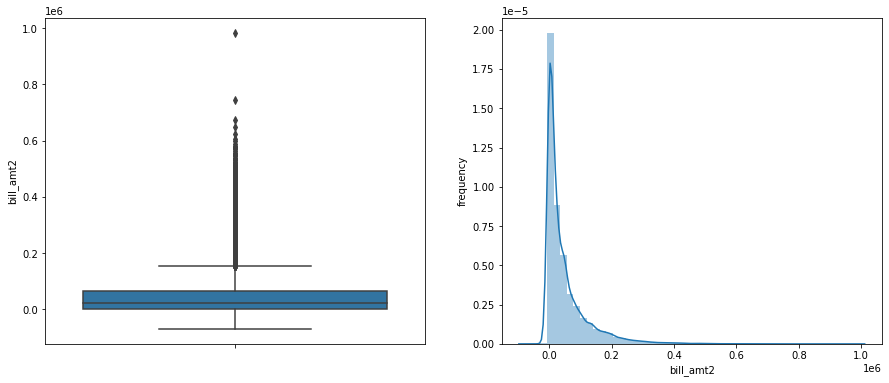

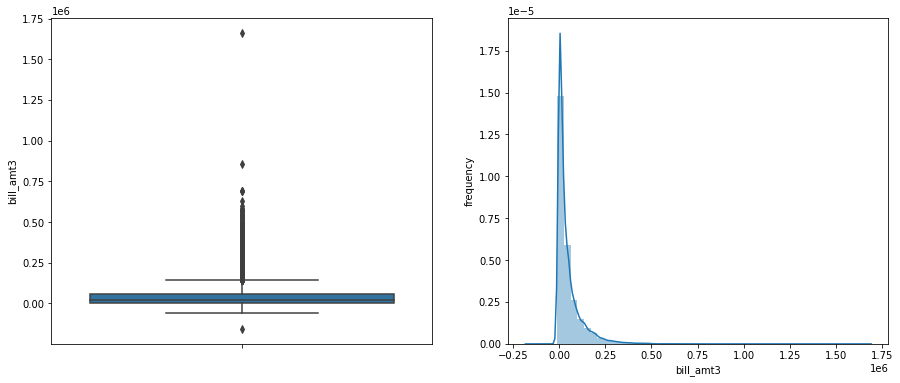

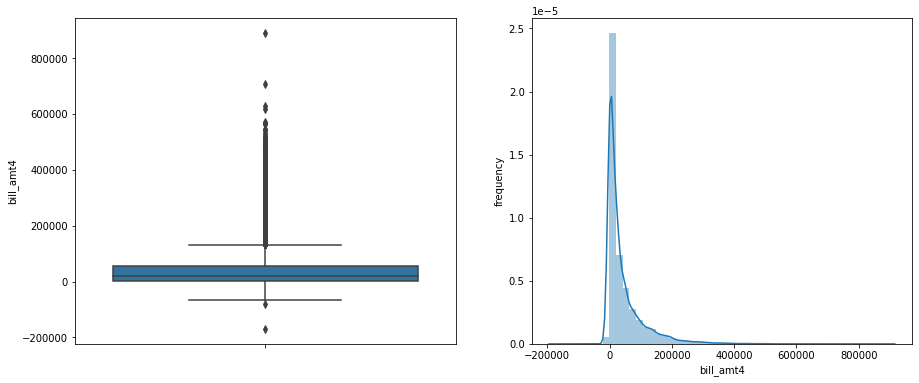

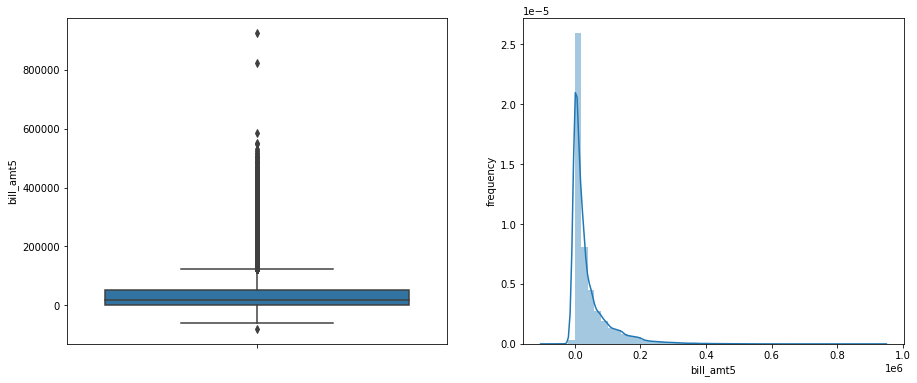

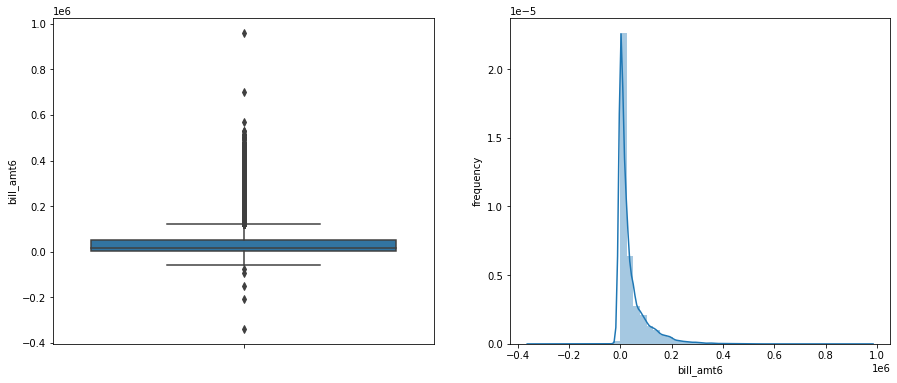

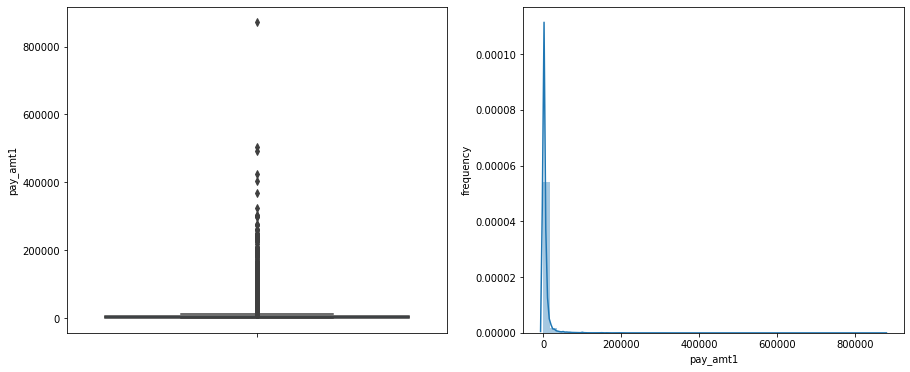

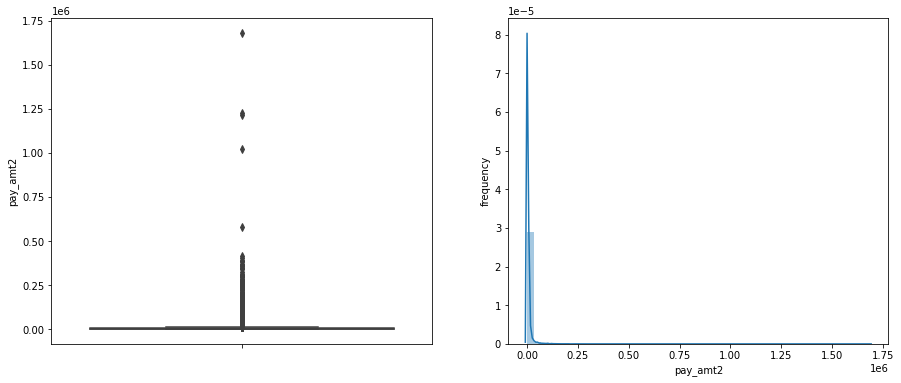

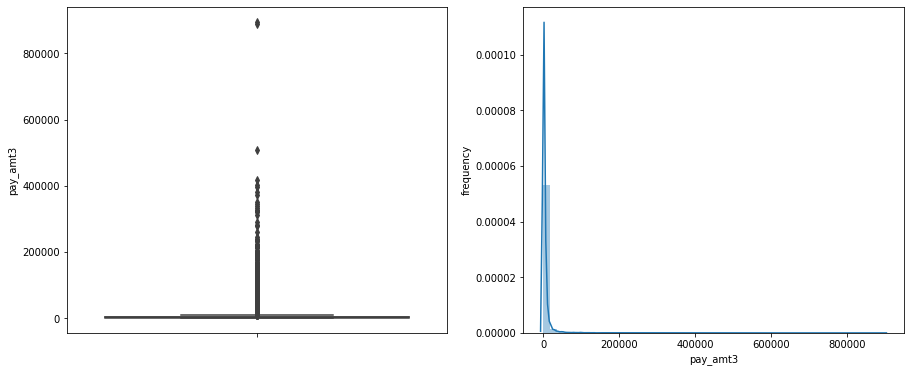

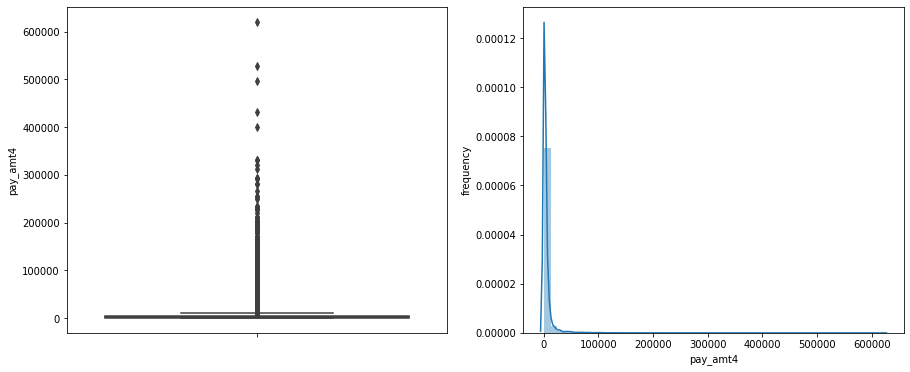

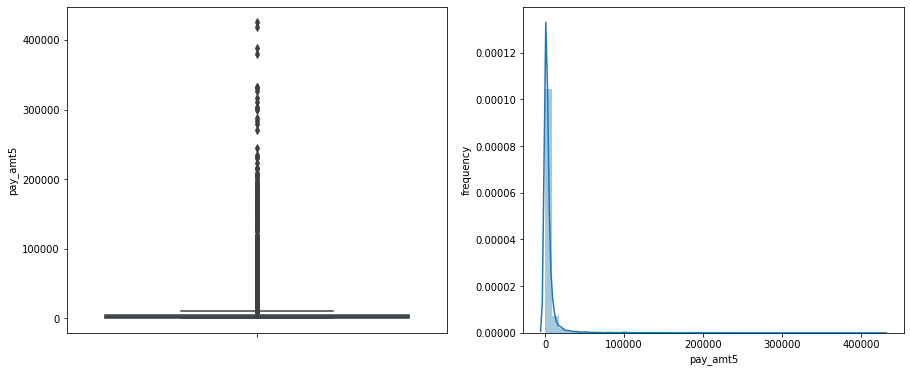

In [38]:

# Plotting bill_amt density plot and 
for col in df1.columns[10:22].tolist():
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  fig = sns.boxplot(y=df1[col])
  fig.set_title('')
  fig.set_ylabel(col)
      
  plt.subplot(1, 2, 2)
  fig = sns.distplot(df1[col])
  fig.set_ylabel('frequency')
  fig.set_xlabel(col)

  plt.show()

**As we can see, the distribution of bill_amt and pay_amt features is right skewed and there are lot of outliers as well. I will use Capping method to take care of the skewness and outliers.**

In [39]:
# Making a copy of the original dataframe for further use
df2 = df1.copy()

In [40]:
# Storing all the continuous feature names in a list
cont = ['limit_bal','bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6','pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']

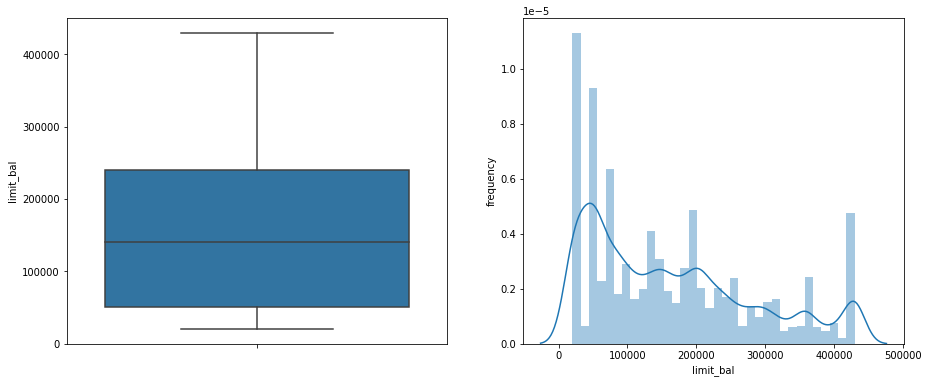

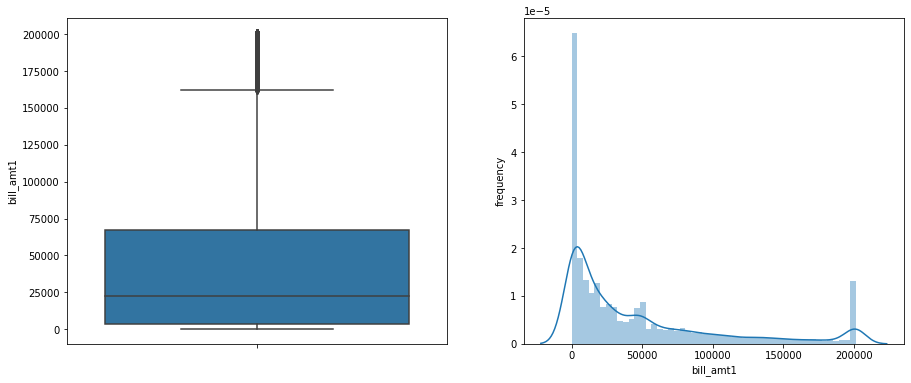

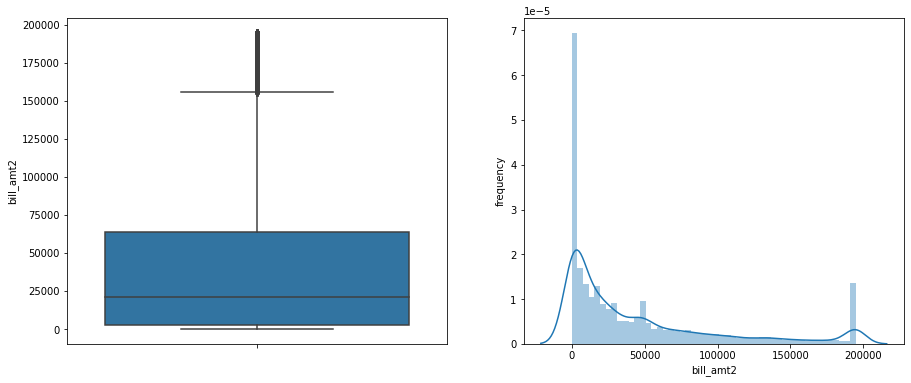

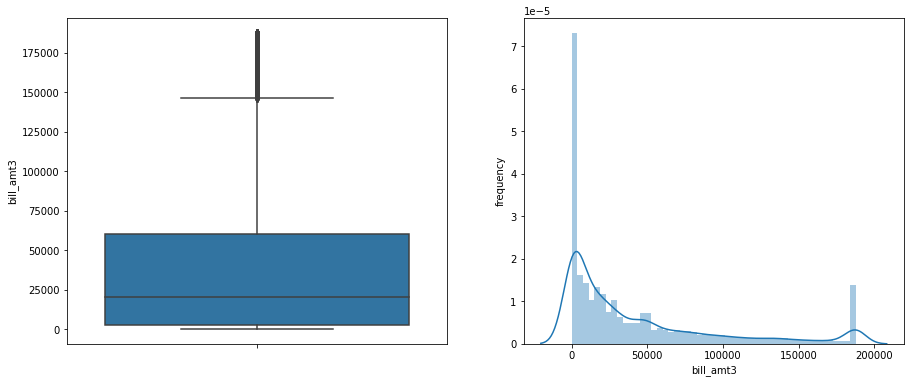

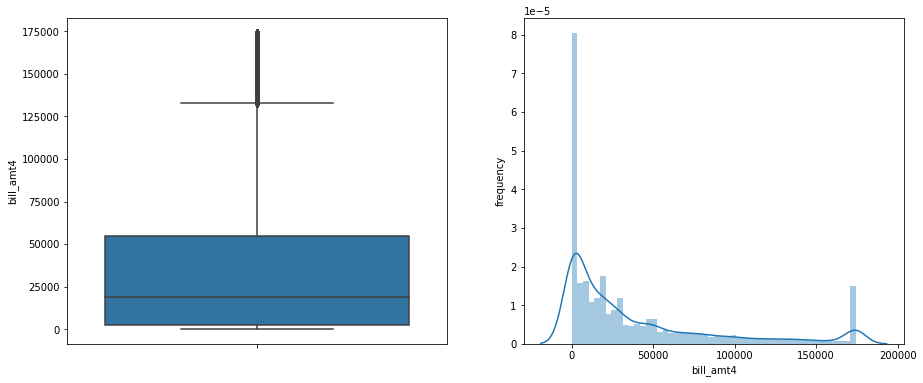

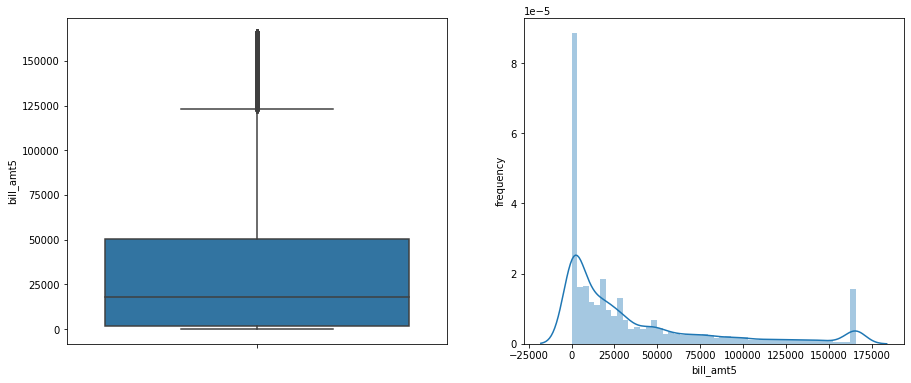

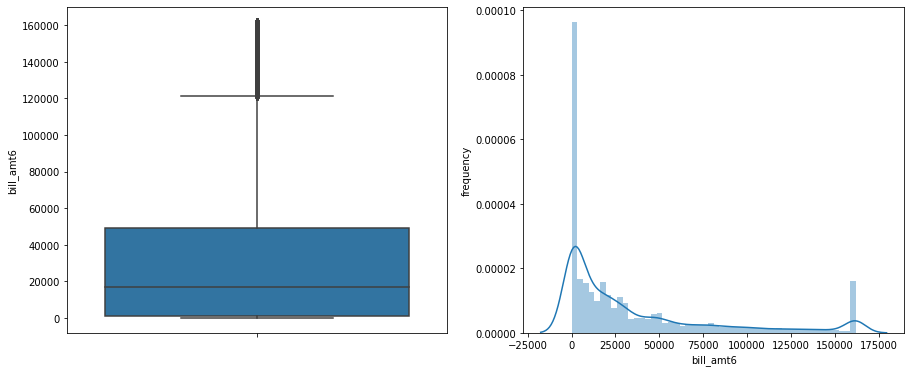

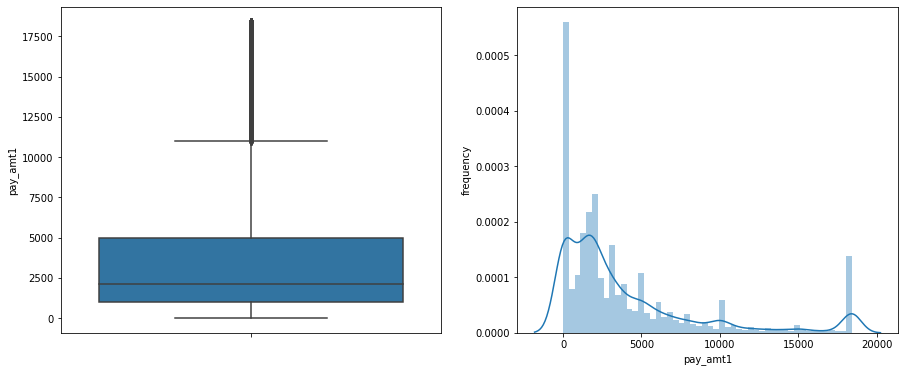

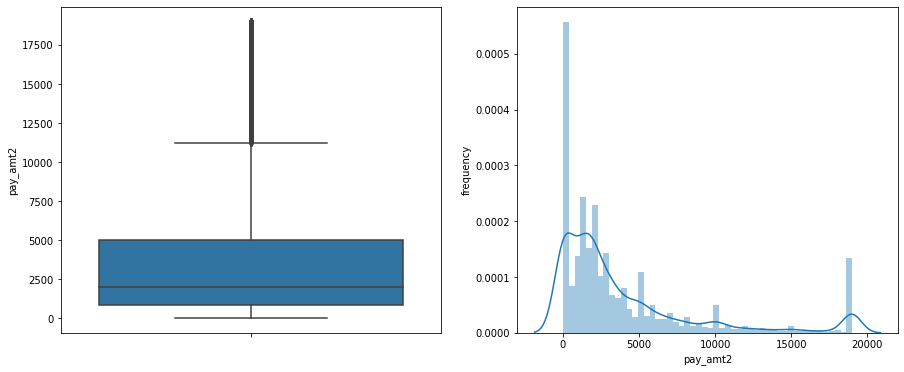

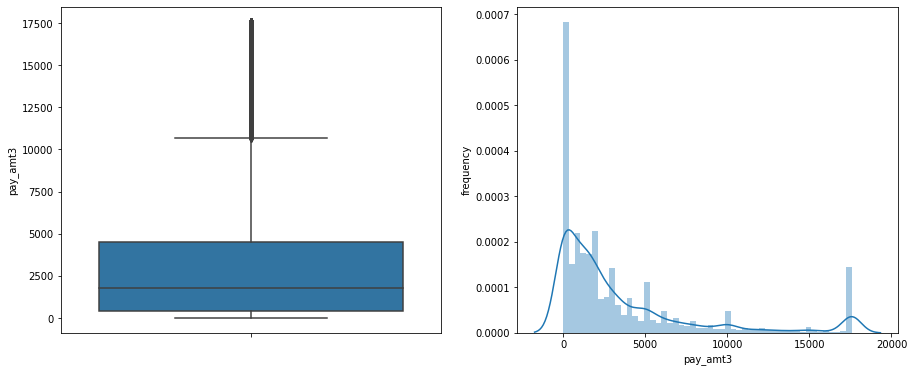

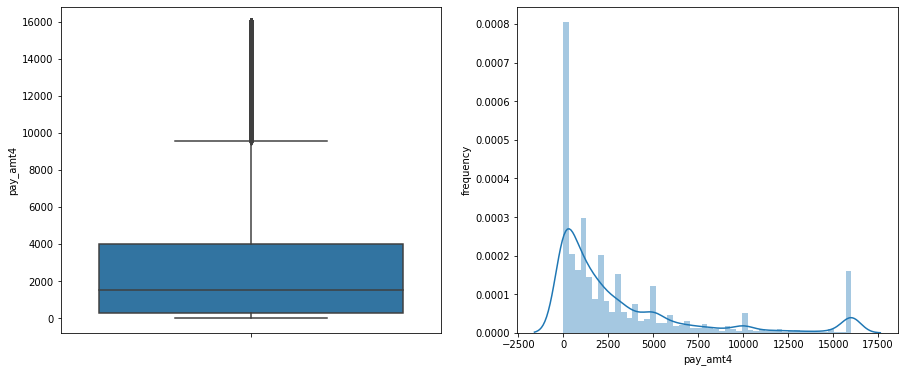

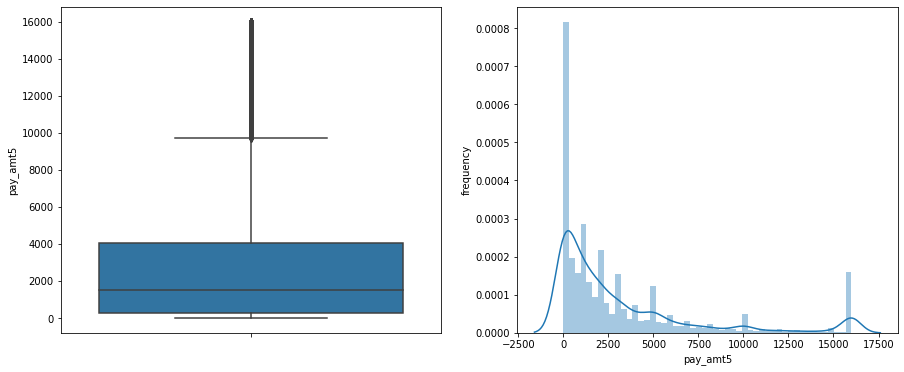

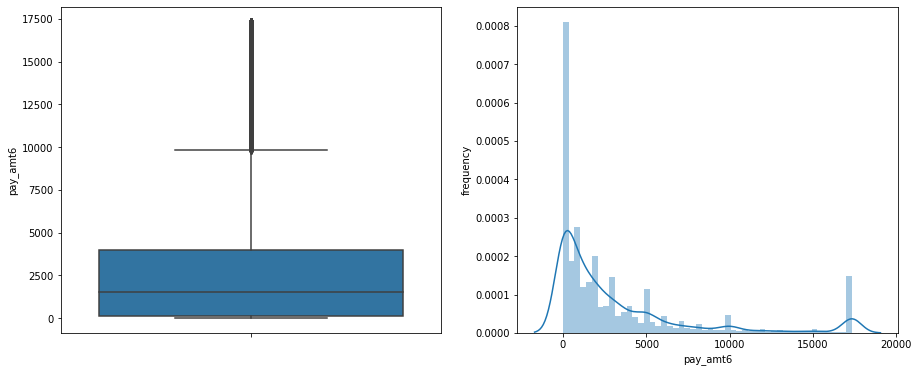

In [41]:
# Capping the outlier rows with percentiles
for col in cont:
  upper_lim = df2[col].quantile(.95)
  lower_lim = df2[col].quantile(.05)
  df2.loc[(df2[col] > upper_lim),col] = upper_lim
  df2.loc[(df2[col] < lower_lim),col] = lower_lim

  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  fig = sns.boxplot(y=df2[col])
  fig.set_title('')
  fig.set_ylabel(col)
      
  plt.subplot(1, 2, 2)
  fig = sns.distplot(df2[col])
  fig.set_ylabel('frequency')
  fig.set_xlabel(col)

  plt.show()

**We managed to deal with most of the outliers and also the skewness of the features. I am not increasing the upper limit and lower limit further so that I don't temper with data that might be usefull.**

##**Feature Engineering**

**First I will be making a new feature that tells if a user has defaulted even once during the past six months.**

In [42]:
# Making a new features that tells if the user  has defaulted at any point in the 6 months


df2['has_def'] = np.where(
    (df2['bill_amt1'] > df2['limit_bal']) |
    (df2['bill_amt2'] > df2['limit_bal']) |
    (df2['bill_amt3'] > df2['limit_bal']) |
    (df2['bill_amt4'] > df2['limit_bal']) |
    (df2['bill_amt5'] > df2['limit_bal']) |
    (df2['bill_amt6'] > df2['limit_bal']), 1, 0
)

**Next, we need to perform One Hot Encoding on the categorical variables. But before that, we need to work on the following points:** \



*  Change values in sex:
     

1.   1 - male
2.   2 - female


*   Change values in education:


1.   1 - graduation

1.   2 - university
2.   3 - high school
4. 0 - others


*   Change values in marriage:


1.   1 - married

1.   2 - single
2.   3 - others



















In [43]:
# Updating values in categorical features

df2['sex'] = df2['sex'].replace({1:'male',2:'female'})
df2['education'] = df2['education'].replace({1:'graduation',2:'university',3:'high_school',0:'others'})
df2['marriage'] = df2['marriage'].replace({1:'married',2:'single',3:'others'})

In [44]:
# Checking the updated dataframe
df2.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,has_def
0,20000,female,university,married,0,2,2,-1,-1,-2,...,0.0,0,0.0,689.00,0.0,0.0,0,0.0,1,0
1,120000,female,university,single,0,-1,2,0,0,0,...,3455.0,3261,0.0,1000.00,1000.0,1000.0,0,2000.0,1,0
2,90000,female,university,single,1,0,0,0,0,0,...,14948.0,15549,1518.0,1500.00,1000.0,1000.0,1000,5000.0,0,0
3,50000,female,university,married,1,0,0,0,0,0,...,28959.0,29547,2000.0,2019.00,1200.0,1100.0,1069,1000.0,0,0
4,50000,male,university,married,3,-1,0,-1,0,0,...,19146.0,19131,2000.0,19004.35,10000.0,9000.0,689,679.0,0,0


###**Encoding categorical variables**

In [45]:
# Encoding
df2 = pd.get_dummies(df2,columns = ['sex','education','marriage'])
df2.head()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,has_def,sex_female,sex_male,education_graduation,education_high_school,education_others,education_university,marriage_married,marriage_others,marriage_single
0,20000,0,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0,1,0,0,0,0,1,1,0,0
1,120000,0,-1,2,0,0,0,2,2682.0,1725.0,...,0,1,0,0,0,0,1,0,0,1
2,90000,1,0,0,0,0,0,0,29239.0,14027.0,...,0,1,0,0,0,0,1,0,0,1
3,50000,1,0,0,0,0,0,0,46990.0,48233.0,...,0,1,0,0,0,0,1,1,0,0
4,50000,3,-1,0,-1,0,0,0,8617.0,5670.0,...,0,0,1,0,0,0,1,1,0,0


###**Checking Class Imbalance**

0    0.7788
1    0.2212
Name: default, dtype: float64


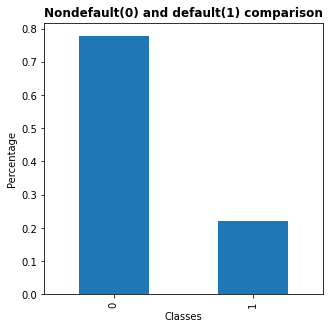

In [46]:
# Check target classes balance
cla_bal = df2['default'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
plt.figure(figsize=(5,5))
cla_bal.plot(kind = 'bar')
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

**As we can see, this dataset has imbalanced classes, with almost 78% non-default vs. 22% default. I will be using SMOTE to oversample the data.**

In [48]:
# Using SMOTE to balance the classes

# Importing SMOTE
from imblearn.over_sampling import SMOTE

# Initialise smote object
smote = SMOTE()

# Separate independent and dependent variables
X = df2.drop(columns=['default'])
y = df2['default']

# Fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)



In [49]:
# Combine balanced X and y
df_final = pd.DataFrame(x_smote, columns=df2.drop(['default'],axis = 1).columns)
df_final['default'] = y_smote

df_final.head()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,sex_female,sex_male,education_graduation,education_high_school,education_others,education_university,marriage_married,marriage_others,marriage_single,default
0,20000,0,2,2,-1,-1,-2,-2,3913.0,3102.0,...,1,0,0,0,0,1,1,0,0,1
1,120000,0,-1,2,0,0,0,2,2682.0,1725.0,...,1,0,0,0,0,1,0,0,1,1
2,90000,1,0,0,0,0,0,0,29239.0,14027.0,...,1,0,0,0,0,1,0,0,1,0
3,50000,1,0,0,0,0,0,0,46990.0,48233.0,...,1,0,0,0,0,1,1,0,0,0
4,50000,3,-1,0,-1,0,0,0,8617.0,5670.0,...,0,1,0,0,0,1,1,0,0,0


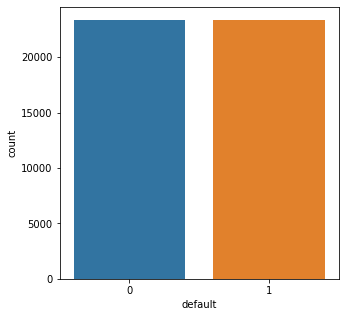

In [50]:
#plot to check if the dataframe is balanced after smote
plt.figure(figsize=(5,5))
sns.countplot('default', data = df_final)

**The classes are balanced after over sampling.**

In [51]:
df_final.columns

Index(['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'has_def', 'sex_female', 'sex_male',
       'education_graduation', 'education_high_school', 'education_others',
       'education_university', 'marriage_married', 'marriage_others',
       'marriage_single', 'default'],
      dtype='object')

##**Feature Selection**

In [52]:
# Define predictor variables and target variable
X = df_final.drop(columns=['default'])
y = df_final['default']

# Save all feature names as list
feature_cols = X.columns.tolist() 


**As we know, the values in the numerical columns are of different scale. So we need to do some scaling of the data.**

##**Data Standardisation & Train-Test Split**

In [53]:
# Standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, stratify=y, random_state=42)

##**Classification Predictive Modelling**

***We will be using a number of Machine Learning algorithms and evaluating their evaluation metrics to see which model fits our data best, and which gives the best results in the predictions.***

###The models that we will be using are:
**Logistic regression** \
**Random Forest Classifier** \
**XG-Boost Classifier** \
**kernel-SVM** 

##**1. Logistic Regression**

In [54]:
# Instantiate model
clf_lr = LogisticRegression(random_state=42)

# Defining an empty list to store ROC_AUC scores
roc_auc = []

# Fit the model
lr = clf_lr.fit(X_train, y_train)

# Use model's default parameters to get cross validation score
scores = cross_val_score(clf_lr, X_train, y_train, scoring ="roc_auc", cv = 5)
roc_auc_lr = np.mean(scores)
roc_auc.append(roc_auc_lr)
print(f'ROC_AUC score for Logistic Regression: ',roc_auc_lr)

ROC_AUC score for Logistic Regression:  0.8993483596372298



**The ROC_AUC score for logistic regression comes out to be 0.899. Let's evaluate the model on some evaluation metrics.**

###**Precision, Recall and F1-score**

In [55]:
# Defining empty lists to store the evaluation metrices values
precision_ = []
recall_ = []
F1_score = []

# Define a function to compute Precision, Recall and F1 score
def get_pre_rec_f1(model,X_test,y_test):
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision * recall) / (precision + recall)

    precision_.append(precision)
    recall_.append(recall)
    F1_score.append(F1)
    
    print(f'Precision:{precision:.3f}\nRecall:{recall:.3f}\nF1 score:{F1:.3f}')

In [56]:
# Evaluating Logistic regression on these evaluation metrics
print('Logistic Regression model on test data:')
get_pre_rec_f1(lr, X_test, y_test)

Logistic Regression model on test data:
Precision:0.936
Recall:0.744
F1 score:0.829


**Here, we are going to consider Recall Score as our evaluation metric, since we are more concerned about predicting maximum number of actual defaulters.** \
**The Recall for Logistic Regression comes out to be 0.74. Let's try to tune parameters of Logistic Regressor to see if we can get a performance out of our model.**


###**Tuning Parameters of Logistic Regression**

In [57]:
# Tuning hyperparameters using Randomised Search CV
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=42)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=42)

lr_best= clf.fit(X_train, y_train)   

print(lr_best.best_params_)

{'C': 0.0031150633640573133, 'penalty': 'l1'}


In [58]:
# Get ROC_AUC score of tuned model on training data

scores_tuned = cross_val_score(lr_best, X_train, y_train, scoring = "roc_auc", cv = 5)
roc_auc_lr_best = np.mean(scores_tuned)

roc_auc.append(roc_auc_lr_best)

print(f'ROC_AUC score after tuning parameters:{roc_auc_lr_best:.3f}')

ROC_AUC score after tuning parameters:0.899


**The ROC_AUC score of Logistic Regression has slightly improved from 0.89 to 0.90 after hyperparameter tuning.**

In [59]:
# Evaluate the tuned model on other metrices
print('Logistic Regression model after hyperparameter tuning on test data:')
get_pre_rec_f1(lr_best, X_test, y_test)

Logistic Regression model after hyperparameter tuning on test data:
Precision:0.932
Recall:0.748
F1 score:0.830


**The Recall for logistic regression has also improved slightly from 0.74 to 0.75.**

##**2. Random Forest Classifier**

In [60]:
# Instantiate model
clf_rf = RandomForestClassifier()
   
# Fit the model
rf = clf_rf.fit(X_train, y_train)

# Use model's default parameters to get cross validation score
scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 5)
roc_auc_rf = np.mean(scores)

roc_auc.append(roc_auc_rf)

print(f'ROC_AUC score for Random Forest Classifier is: ',roc_auc_rf)

ROC_AUC score for Random Forest Classifier is:  0.9326172930872147


In [61]:
# Evaluating Random Forest Classifier on other evaluation metrics
print('Random Forest Classifier model on test data:')
get_pre_rec_f1(rf, X_test, y_test)

Random Forest Classifier model on test data:
Precision:0.903
Recall:0.839
F1 score:0.870


**The ROC_AUC score and Recall for Random Forest Classifier comes out to be 0.93 and 0.83 respectively.** \
**Let's try to tune hyperparameters of Random Forest Classifier to see if the model performance improves.**


###**Tuning hyperparameters of Random Forest Classifier**

In [63]:
# Create parameter grid  
param_grid = {
    'max_depth': [20, 40, 60],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}


# Instantiate grid search model
grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid,    
                          cv = 3, n_jobs = -1, verbose = 1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'max_depth': 60, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [65]:
# Fitting the Random Forest model on best parameters
rf_best = RandomForestClassifier(**grid_search.best_params_)
rf_best.fit(X_train,y_train)

#  Use model's best parameters to get cross val score
scores_best = cross_val_score(rf_best, X_train, y_train, scoring ="roc_auc", cv = 5)
roc_auc_best = np.mean(scores_best)

roc_auc.append(roc_auc_best)

print(f'ROC_AUC training score after tuning for Random Forest: {roc_auc_best:.3f}')

ROC_AUC training score after tuning for Random Forest: 0.931


In [66]:
# Evaluating Random Forest Classifier with best parameters on other evaluation metrics
print('Random Forest Classifier model on test data:')
get_pre_rec_f1(rf_best, X_test, y_test)

Random Forest Classifier model on test data:
Precision:0.899
Recall:0.834
F1 score:0.865


**The recall and ROC_AUC score for tuned Random Forest Classifier comes out to be 0.83 and 0.93 respectively and has not changed even a bit.**

##**XGB Classifier**

In [67]:
# Instantiate model with default parameters
clf_xgb = XGBClassifier()
    
# Fit the model
xgb = clf_xgb.fit(X_train, y_train)

# Use model's default parameters to get cross validation score
scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 5)
roc_auc_xgb = np.mean(scores)

roc_auc.append(roc_auc_xgb)

print(f'ROC_AUC score for XGB Classifier is: ',roc_auc_xgb)

ROC_AUC score for XGB Classifier is:  0.9190910430846948


In [68]:
# Evaluating XGB Classifier on other evaluation metrics
print('XGB Classifier model on test data:')
get_pre_rec_f1(xgb, X_test, y_test)

XGB Classifier model on test data:
Precision:0.916
Recall:0.784
F1 score:0.845


**The ROC_AUC score and Recall for XGB Classifier comes out to be 0.91 and 0.78 respectively.** \
**Let's try to tune hyperparameters of XGB Classifier and see if the model's performance improves.**

###**Tuning Parameters of XGB Classifier**

In [69]:

# Number of trees
n_estimators = np.arange(200,600,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.6,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,6,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }
pprint(random_grid_xgb)

{'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]),
 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]),
 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
 'max_depth': [3, 4, 5],
 'n_estimators': array([200, 400]),
 'scale_pos_weight': [1, 3.5],
 'subsample': array([0.5, 0.6, 0.7, 0.8])}


In [72]:
# Use randomized search to find best parameters

xgboost = XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = xgboost, 
                                param_distributions = random_grid_xgb, 
                                n_iter = 100, 
                                cv = 3, 
                                verbose=1, 
                                random_state=42, 
                                n_jobs = -1,
                                scoring ='roc_auc')


xgb_random.fit(X_train, y_train)   
xgb_random.best_params_, xgb_random.best_score_

roc_auc.append(xgb_random.best_score_)
print(xgb_random.best_params_,xgb_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7999999999999999} 0.926597557222825


In [73]:
# Evaluating XGB Classifier with best parameters on other evaluation metrics
xgb_best = XGBClassifier(**xgb_random.best_params_)
xgb_best.fit(X_train, y_train)


print('XGB Classifier tuned model on test data:')
get_pre_rec_f1(xgb_best, X_test, y_test)



XGB Classifier tuned model on test data:
Precision:0.921
Recall:0.800
F1 score:0.856


**The ROC_AUC score and Recall for XGB Classifier after hyperparameter tuning are 0.92 and 0.80 and have improved a little from the default scores.**

##**SVM Classifier**

In [77]:
# Instantiating the model
clf_svm = SVC(kernel="rbf")

# Fitting the model
clf_svm.fit( X_train, y_train )

# Use model's default parameters to get the cross val score
scores = cross_val_score(clf_svm, X_train, y_train, cv=10)
roc_auc_svm = np.mean(scores)

roc_auc.append(roc_auc_svm)

print(f'ROC_AUC score for SVM Classifier is: ',roc_auc_svm)

# Predicting on the test set
y_pred = clf_svm.predict( X_test )

# Evaluating SVM Classifier on the evaluation metrics
print('SVM Classifier model on test data:')
get_pre_rec_f1(clf_svm, X_test, y_test)

ROC_AUC score for SVM Classifier is:  0.8521814069896049
SVM Classifier model on test data:
Precision:0.928
Recall:0.764
F1 score:0.838


**The ROC_AUC score and Recall for SVM classifier are 0.85 and 0.76 respectively.**

###**Now let's get all the results into a dataframe**

In [78]:
# Making a new list with names of the models used

models = ['Logistic Regression','Logistic Regression Tuned','Random Forest','Random Forest Tune','XGB','XGB Tuned','SVM']

In [81]:
# Creating a dataframe storing all the evaluation metrics list

performance_df = pd.DataFrame({'Models':models,'ROC_AUC':roc_auc,'Precision':precision_,'Recall':recall_,'F1 Score':F1_score}).sort_values(by="Recall",ascending=False)

In [82]:
# Printing performance df
performance_df

,Models,ROC_AUC,Precision,Recall,F1 Score
2,Random Forest,0.932617,0.902716,0.839349,0.869880
3,Random Forest Tune,0.931066,0.899492,0.833785,0.865393
5,XGB Tuned,0.926598,0.920565,0.800257,0.856205
4,XGB,0.919091,0.916111,0.783707,0.844752
6,SVM,0.852181,0.928386,0.763875,0.838134
1,Logistic Regression Tuned,0.899292,0.932053,0.747610,0.829705
0,Logistic Regression,0.899348,0.936231,0.743615,0.828880


##**Here we can see, The Random Forest Classifier with default parameters has performed the best in terms of all the evaluation metrices.**
##**So Random Forest Classifier will be our top pick to predict the defaulters.**

##**Confusion Matrix**

**Plotting confusion matrix for the to 3 models.**